## Imports

In [1]:
import pandas as pd
import json
from IPython.display import display, HTML
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Extract Relevant Data from Json

In [2]:
with open('flats_phy-IEEE802.11.json', 'r') as openfile:
    wlan = json.load(openfile)

In [3]:
wlan_df = pd.DataFrame()

for device in wlan:    
    wlan_data = {
        "key": [device['kismet.device.base.key']], 
        "device_name": [device['kismet.device.base.name']],
        "device_type": [device['kismet.device.base.type']],
        "num_packets": [device['kismet.device.base.packets.total']],
        "manuf": [device['kismet.device.base.manuf']], 
        "macaddr": [device['kismet.device.base.macaddr']],
        "channel": [device['kismet.device.base.channel']],
        "first_seen": [device['kismet.device.base.first_time']], 
        "last_seen": [device['kismet.device.base.last_time']]

    }
    
    wlan_df = pd.concat([wlan_df, pd.DataFrame(wlan_data)], ignore_index=True)

In [4]:
# displaying the dataframe
display(HTML(wlan_df.to_html()))
# display(wlan_df)

In [5]:
#Check df info to make sure we don't have any null/nan values
wlan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8019 entries, 0 to 8018
Data columns (total 9 columns):
key            8019 non-null object
device_name    8019 non-null object
device_type    8019 non-null object
num_packets    8019 non-null int64
manuf          8019 non-null object
macaddr        8019 non-null object
channel        8019 non-null object
first_seen     8019 non-null int64
last_seen      8019 non-null int64
dtypes: int64(3), object(6)
memory usage: 564.0+ KB


## Generate Analysis + Visuals

#### Distribution of Device Types

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6,4))
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
    
print(wlan_df['device_type'].value_counts())
fig = wlan_df['device_type'].value_counts(dropna=True).plot(kind='bar', rot=0)
plt.show()

Wi-Fi Client     7187
Wi-Fi Bridged     632
Wi-Fi AP          128
Wi-Fi Device       65
Wi-Fi Ad-Hoc        7
Name: device_type, dtype: int64


<Figure size 600x400 with 1 Axes>

#### Distribution of Devices 

                           7906
Airwave-5G-4-cww4sv0vs2       2
Airwave-4-cww4sv0vs2          2
Airwave-4-bvv4vx0us8          2
Airwave-5G-6-cuw5uy0zv2       2
                           ... 
Airwave-5G-4-cwv3uw0uy2       1
2C:5D:93:AF:D5:4C             1
Airwave-5-za6vv3y1            1
84:18:3A:8D:C8:FC             1
Airwave-5G-8-cyy8vv0ss2       1
Name: device_name, Length: 108, dtype: int64


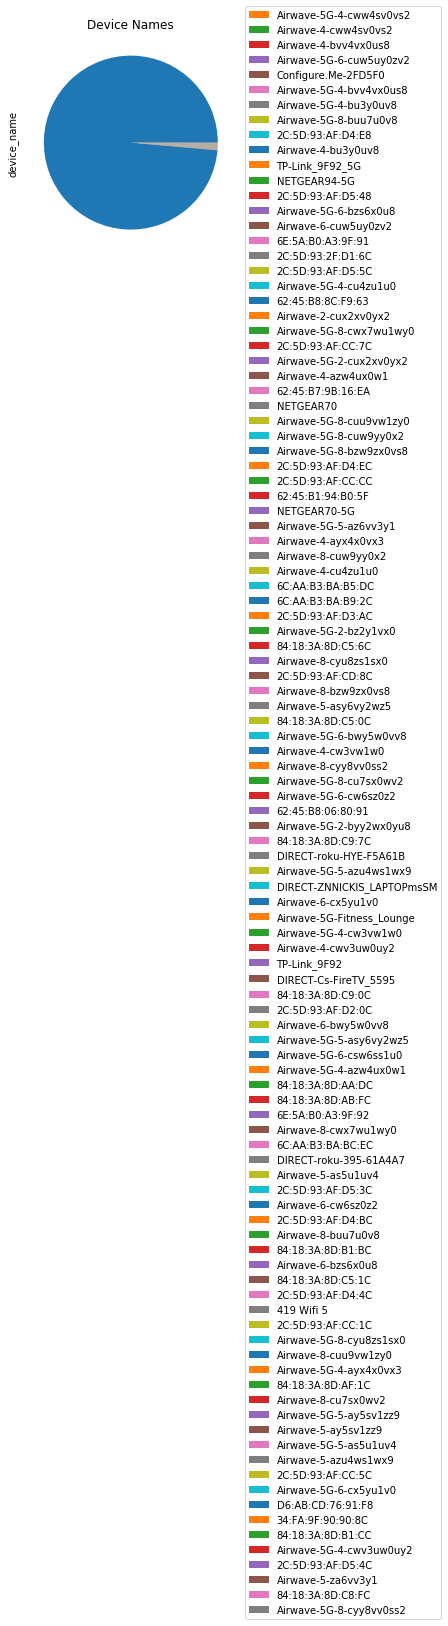

In [7]:
    
print(wlan_df['device_name'].value_counts())
chart = wlan_df['device_name'].value_counts(dropna=True).plot(kind='pie',legend=True, title="Device Names", labeldistance=None) #autopct="%1.0f%%"
chart.legend(bbox_to_anchor=(1, 1.15), loc='upper left')


#### Time Data --> First/Last Seen Timestamp : Device Mapping, Total Time Chart, ...

In [8]:
#Device mapping to first/last seen

#getting time data associated with a specific device (id'd by macaddr)
time_data = wlan_df[["macaddr",  "num_packets", "first_seen", "last_seen"]]
diff = time_data['last_seen'] - time_data['first_seen']
hours = diff / 3600
time_data['time_between (hours)'] = hours


#converting unix timestamp to a readable string version for viewing
for i in time_data['first_seen'].values:
    new_i = datetime.utcfromtimestamp(int(i)).strftime('%Y-%m-%d %H:%M:%S')
    time_data['first_seen'].replace(i, new_i, inplace = True)
for i in time_data['last_seen'].values:
    new_i = datetime.utcfromtimestamp(int(i)).strftime('%Y-%m-%d %H:%M:%S')
    time_data['last_seen'].replace(i, new_i, inplace = True)

#styling table
time_data.style.hide_index()
time_data.style.set_properties(**{'border': '1.3px solid green',
                          'color': 'blue'})

# display(time_data)
display(HTML(time_data.to_html()))

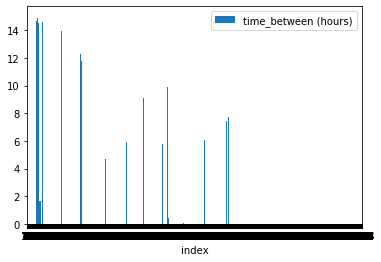

In [9]:
#graph of time_between (last_seen - first_seen) for each device
graph = time_data.reset_index().plot(x="index",  y=["time_between (hours)"], xticks=[], kind="bar", rot=0)

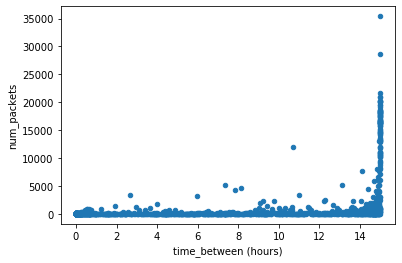

In [10]:
time_data.plot.scatter('time_between (hours)', 'num_packets')

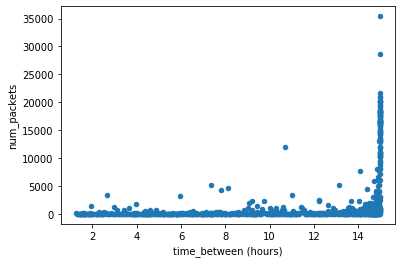

In [11]:
time_data[time_data['time_between (hours)']>1.25].plot.scatter('time_between (hours)', 'num_packets')

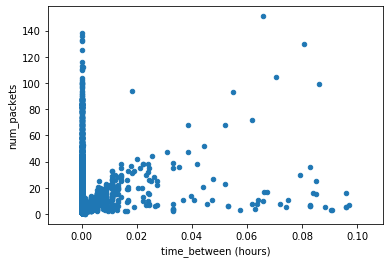

In [12]:
time_data[time_data['time_between (hours)']<0.1].plot.scatter('time_between (hours)', 'num_packets')

#### Distribution of Device Manufacturers

Unknown                                7343
Apple                                   186
Ruckus Wireless                         152
Intel Corporation                        71
Amazon Technologies Inc.                 49
                                       ... 
Comcast Cable Corporation                 1
Private                                   1
TPV Display Technology (Xiamen) Ltd       1
Philips Lighting BV                       1
Beijing Roborock Technology Ltd           1
Name: manuf, Length: 61, dtype: int64


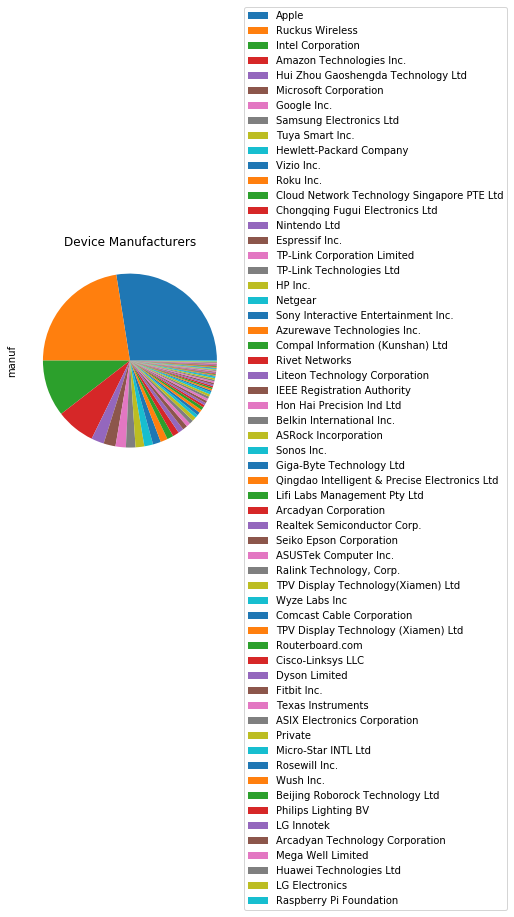

In [13]:
# Define the ratio of gap of each fragment in a tuple
# explode = (0.05, 0.05, 0.05, 0.05, 0.05)
    
print(wlan_df['manuf'].value_counts())
chart = wlan_df[~wlan_df["manuf"].str.contains('Unknown', na=False)]['manuf'].value_counts().plot(kind='pie', legend=True, title="Device Manufacturers", labeldistance=None) #autopct="%1.0f%%"
chart.legend(bbox_to_anchor=(1, 2.15), loc='upper left')


#### Packet Data

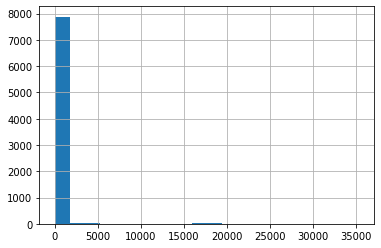

In [14]:
wlan_df['num_packets'].hist(bins=20)

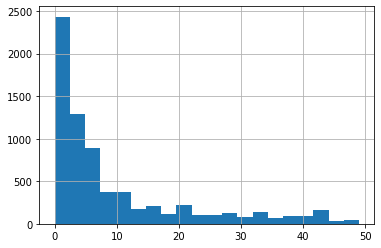

In [15]:
wlan_df[wlan_df['num_packets']<50]['num_packets'].hist(bins=20)


In [16]:
wlan_df[wlan_df['num_packets']<10]

key device_name    device_type  num_packets  \
57    4202770D00000000_7394FF002500               Wi-Fi Ad-Hoc            0   
64    4202770D00000000_6FC401892B5A               Wi-Fi Client            8   
84    4202770D00000000_AF4715412B10              Wi-Fi Bridged            4   
97    4202770D00000000_C1E248E098AE               Wi-Fi Client            2   
116   4202770D00000000_F2E4DD94B422               Wi-Fi Client            3   
...                             ...         ...            ...          ...   
8012   4202770D00000000_C02F3818D9A               Wi-Fi Client            4   
8013  4202770D00000000_8A7F4C205682               Wi-Fi Client            1   
8015  4202770D00000000_38040FC9779E               Wi-Fi Client            7   
8016  4202770D00000000_BFE3E6851C32               Wi-Fi Client            3   
8017  4202770D00000000_EA351519E642               Wi-Fi Client            4   

                        manuf            macaddr channel  first_seen  \
57                      Apple  00:25:00:FF:94:73     149  1682108806   
64                    Unknown  5A:2B:89:01:C4:6F     149  1682108806   
84    Samsung Electronics Ltd  10:2B:41:15:47:AF     157  1682108810   
97                    Unknown  AE:98:E0:48:E2:C1     149  1682108814   
116                   Unknown  22:B4:94:DD:E4:F2     149  1682108826   
...                       ...                ...     ...         ...   
8012                  Unknown  9A:8D:81:F3:02:0C          1682162671   
8013                  Unknown  82:56:20:4C:7F:8A       6  1682162696   
8015                  Unknown  9E:77:C9:0F:04:38       6  1682162731   
8016                  Unknown  32:1C:85:E6:E3:BF          1682162732   
8017                  Unknown  42:E6:19:15:35:EA          1682162735   

       last_seen  
57    1682162763  
64    1682108818  
84    1682108810  
97    1682108814  
116   1682108826  
...          ...  
8012  1682162671  
8013  1682162696  
8015  1682162736  
8016  1682162732  
8017  1682162735  

[4987 rows x 9 columns]

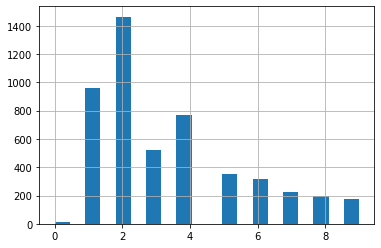

In [17]:
wlan_df[wlan_df['num_packets']<10]['num_packets'].hist(bins=20)

In [18]:
wlan_df[wlan_df['num_packets']>500]


key              device_name   device_type  \
0     4202770D00000000_F7D56F935D2C      Configure.Me-2FD5F0      Wi-Fi AP   
2     4202770D00000000_E8D4AF935D2C        2C:5D:93:AF:D4:E8      Wi-Fi AP   
3     4202770D00000000_E8D46F935D2C  Airwave-5G-4-bvv4vx0us8      Wi-Fi AP   
4     4202770D00000000_E8D42F935D2C     Airwave-4-bvv4vx0us8      Wi-Fi AP   
5      4202770D00000000_CD22F935D2C       Airwave-4-cu4zu1u0      Wi-Fi AP   
...                             ...                      ...           ...   
6313  4202770D00000000_A6093BA42CFE                           Wi-Fi Client   
6497  4202770D00000000_A832C6A5CAB6                           Wi-Fi Client   
6875  4202770D00000000_F8DACD96B186                           Wi-Fi Client   
7178  4202770D00000000_F866F46C5202                           Wi-Fi Client   
7834  4202770D00000000_70401654D7FA                           Wi-Fi Client   

      num_packets            manuf            macaddr channel  first_seen  \
0           16275  Ruckus Wireless  2C:5D:93:6F:D5:F7      48  1682108802   
2           10125  Ruckus Wireless  2C:5D:93:AF:D4:E8       1  1682108802   
3           13057  Ruckus Wireless  2C:5D:93:6F:D4:E8       1  1682108802   
4           13674  Ruckus Wireless  2C:5D:93:2F:D4:E8       1  1682108802   
5           20045  Ruckus Wireless  2C:5D:93:2F:D2:0C      44  1682108804   
...           ...              ...                ...     ...         ...   
6313          647          Unknown  FE:2C:A4:3B:09:A6     149  1682145208   
6497          960          Unknown  B6:CA:A5:C6:32:A8     149  1682146460   
6875          696          Unknown  86:B1:96:CD:DA:F8     149  1682149966   
7178          954          Unknown  02:52:6C:F4:66:F8     149  1682153630   
7834          840          Unknown  FA:D7:54:16:40:70       6  1682160616   

       last_seen  
0     1682162765  
2     1682162759  
3     1682162759  
4     1682162759  
5     1682162760  
...          ...  
6313  1682162763  
6497  1682148707  
6875  1682151562  
7178  1682155558  
7834  1682162493  

[255 rows x 9 columns]

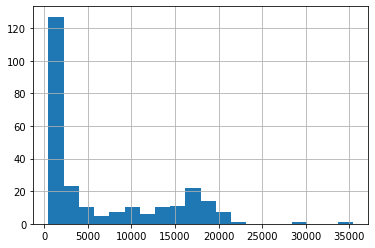

In [19]:
wlan_df[wlan_df['num_packets']>500]['num_packets'].hist(bins=20)